In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
# from torchvision import transforms
import os
import glob
import torch
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [16]:
def preprocess_image(filename):
    
    # create figure
    plt.tight_layout()
    fig = plt.figure(figsize=(10, 10))

    # setting values to rows and column variables 
    rows = 2
    columns = 2

    input_image = Image.open(filename)
    
    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, 1)
    
    # showing image 
    plt.imshow(input_image) 
    # plt.axis('off') 
    plt.title(f"Input Image: size {input_image.size}") 

    input_image.load()
    background = Image.new("RGB", input_image.size, (255, 255, 255))
    background.paste(input_image, mask = input_image.split()[3])
    
    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 
      
    # showing image 
    plt.imshow(background) 
    # plt.axis('off') 
    plt.title(f"After converting to RGB: size {background.size}") 
    
    # background2 = input_image.convert('RGB')

    # # Adds a subplot at the 3rd position 
    # fig.add_subplot(rows, columns, 3) 
      
    # # showing image 
    # plt.imshow(background2) 
    # plt.axis('off') 
    # plt.title(f"After converting to RGB (method 2) with size {background2.size}") 

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    preprocess2 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop((224, 224))
    ])    
    
    # Adds a subplot at the 3rd position 
    fig.add_subplot(rows, columns, 3) 

    # print(f"Image after transformation with modes {preprocess2(background).mode} 
    # and size {preprocess2(background).size}")
    
    # showing image 
    plt.imshow(preprocess2(background)) 
    # plt.axis('off') 
    plt.title(f"Image after transformation: size {preprocess2(background).size}") 
    
    
    #******************************************************************************************
    transformed_image = preprocess(background)

    demo_array = np.moveaxis(transformed_image.numpy()*255, 0, -1)
    # transformed_image = transformed_image.numpy().transpose((1, 2, 0))
    # # undo image normalization
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # transformed_image = std * transformed_image + mean
    # transformed_image = np.clip(transformed_image, 0, 1)
    # print(Image.fromarray(demo_array.astype(np.uint8)))

    # Adds a subplot at the 4th position 
    fig.add_subplot(rows, columns, 4) 
    
    # showing image 
    plt.imshow(demo_array) 
    # plt.axis('off') 
    plt.title(f"Image input in ResNet: size {demo_array.shape}") 
    #*******************************************************************************************

    return preprocess(background).unsqueeze(0)
    # return preprocess2(background)


In [17]:
sample_folder = "../India_95/complete/26"
image = os.listdir(sample_folder)
image

['20200213_120556_forniceal_palpebral.png',
 '20200213_120556_forniceal.png',
 '20200213_120556.jpg',
 '20200213_120556_palpebral.png',
 '.ipynb_checkpoints']

In [18]:
images = []
for img in image:
    path = os.path.join(sample_folder,img)
    images.append(path)

images

['../India_95/complete/26/20200213_120556_forniceal_palpebral.png',
 '../India_95/complete/26/20200213_120556_forniceal.png',
 '../India_95/complete/26/20200213_120556.jpg',
 '../India_95/complete/26/20200213_120556_palpebral.png',
 '../India_95/complete/26/.ipynb_checkpoints']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

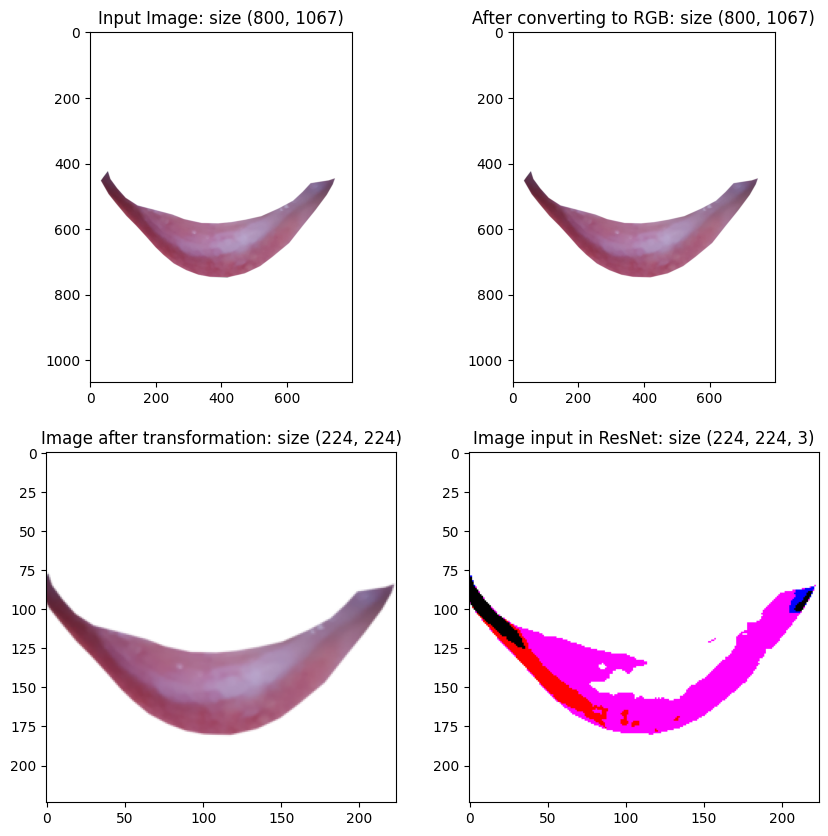

In [140]:
img = preprocess_image(images[0])

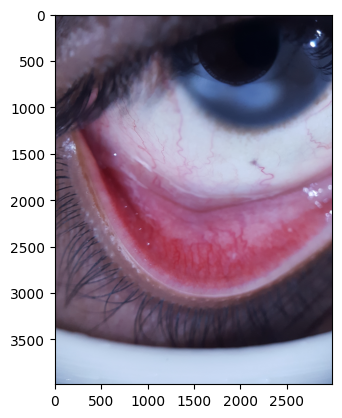

In [14]:
img = cv2.imread(images[3])

img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
plt.imshow(img)
# cv2.imshow("",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()